### Functions and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
# Set font size of plot elements\n",
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def noise_pow(ω, ω_c, κ, r, g, Q, Δ, nc, nT):
    """
    function for calculating the noise power spectrum per equation 2 in Kurt's paper
    :param ω:      frequency offset from the cavity frequency
    :param ω_c:    frequency of the cavity
    :param κ:      output coupling rate of cavity
    :param r:      effective cooling rate term
    :param g:      collective interaction between spins and cavity
    :param Q:      quality factor of cavity
    :param Δ:      detuning
    :param nc:     number of photons in the cold spin ensemble
    :param nT:     number of photons in the thermal mode
    :returns:      the noise power at ω
    """
    a = nc - nT
    num = κ * r * g ** 2
    den_b = ((r ** 2 / 4) + ω ** 2) * ((κ + ω_c / Q) ** 2 / 4 + (ω - Δ) ** 2)
    den_c = (r * (κ + ω_c / Q) / 2 - 2 * ω * (ω - Δ))

    return nT + a * num / (den_b + g ** 2 * den_c + g ** 4)

In [4]:
def mean_photons_cavity(κ, ω_c, Q, r, g, nT, nc):
    """
    function for calculating the steady state photon number in the cavity per equation 98 in Kurt's supplemental info document
    """
    num = (κ + ω_c / Q) * nT + r * g ** 2 / ((r/2)**2 + (r/2)*((κ+ω_c / Q) / 2) + g ** 2) * nc
    den = (κ + ω_c / Q) + r * g ** 2 / ((r/2)**2 + (r/2)*((κ+ω_c / Q) / 2) + g ** 2)
    return num / den

In [5]:
def temp_from_photons(ω_c, num_photons):
    hbar_ov_k = 7.639e-12 
    return hbar_ov_k * ω_c / np.log(1 / num_photons + 1)

In [6]:
def photons_from_temp(ω_c, temp):
    hbar_ov_k = 7.639e-12
    return (np.exp(hbar_ov_k * ω_c / temp) - 1) ** -1

## T = 77 K, Q = 10, 000

### Set up and miscellaneous testing

In [7]:
# Define parameters.  According to Ethan, Q = 10,000 @ T = 77 K and g_j = 1 Hz at minimum
κ = 0
ω = 0                                           
ωc = 2.87 * 2 * np.pi * 1e9        
hbar_ov_k = 7.639e-12   
Q = 1e4
T = 77
γ = ωc / Q 
P = 1

In [8]:
# Sweep over values of g now
g = np.logspace(6, 9, 10000)
r = g.copy()

In [9]:
# Calculate the number of photons
nc = 0.5 * (1 - P) / P
nT = photons_from_temp(ωc, T)

In [10]:
nT

558.4752332974967

In [11]:
Np_v_g = noise_pow(ω, ωc, κ, r, g, Q, 0, nc, nT)
T_v_g = hbar_ov_k * ωc * 2 * np.pi / np.log(1 / Np_v_g + 1)
nbar_v_g = mean_photons_cavity(κ, ωc, Q, g, g, nT, nc)

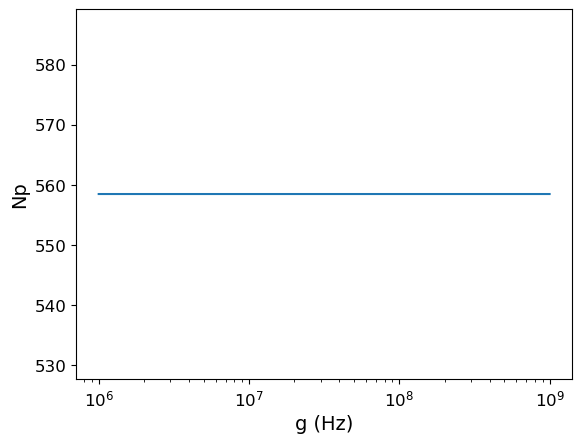

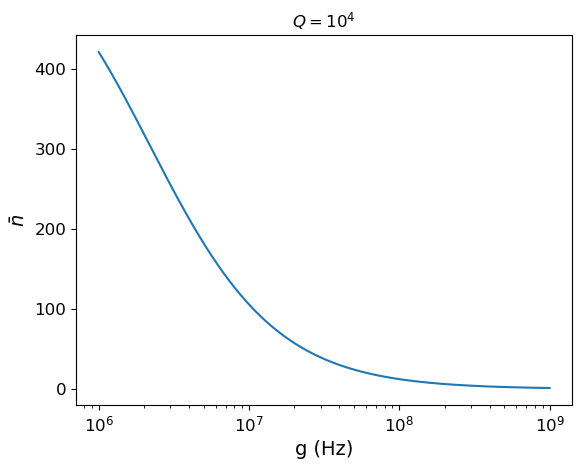

In [12]:
plt.figure(1)
plt.plot(g, Np_v_g)
plt.xlabel("g (Hz)")
plt.ylabel("Np")
plt.xscale('log')
plt.savefig("Np_v_g_κ=0_T=77K_P=0.8.png", format='png', dpi=300)

plt.figure(2)
plt.title("$Q=10^4$")
plt.plot(g, nbar_v_g)
plt.xlabel("g (Hz)")
plt.ylabel("$\\bar{n}$")
plt.xscale('log')
plt.savefig("n_v_g_κ=0_T=77K_P=1.png", format='png', dpi=300)

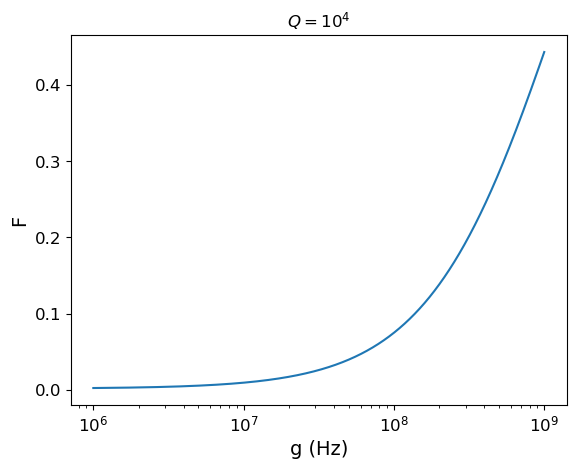

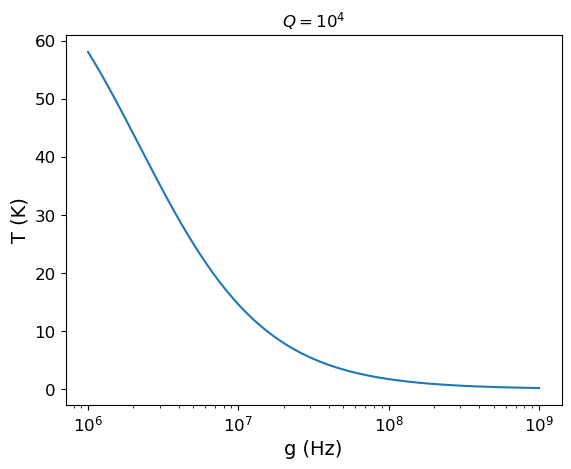

In [13]:
# Convert to fidelity
f = 1 / (nbar_v_g + 1)
plt.title("$Q=10^4$")
plt.plot(g, f)
plt.xlabel("g (Hz)")
plt.xscale('log')
plt.ylabel("F")
plt.savefig("f_v_g_κ=0_T=77K_P=1.png", format='png', dpi=300)

# Convert to temperature
plt.figure(2)
t = temp_from_photons(ωc, nbar_v_g)
plt.title("$Q=10^4$")
plt.plot(g, t)
plt.xlabel("g (Hz)")
plt.xscale('log')
plt.ylabel("T (K)")
#plt.yscale('log')
plt.savefig("t_v_g_κ=0_T=77K_P=1.png", format='png', dpi=300)

### Sweep over parameters

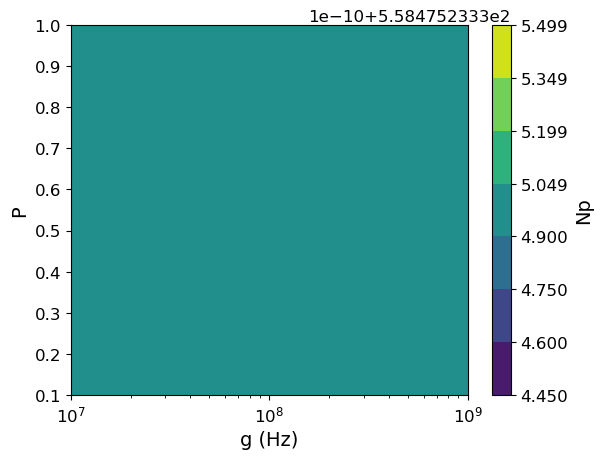

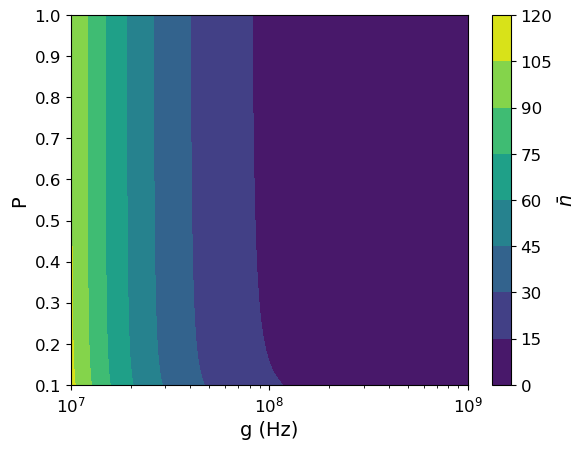

In [14]:
# Let's try sweeping over a couple of different parameters with g to see what we can find.  We'll keep Q fixed for now
# First let's do P
g = np.logspace(7, 9, 10000)
P_sweep = np.linspace(0.1, 1, 1000)
nc_sweep = 0.5 * (1 - P_sweep) / P_sweep

gm, ncm = np.meshgrid(g, nc_sweep)
Np_P_sweep = noise_pow(ω, ωc, κ, gm, gm, Q, 0, ncm, nT)
plt.figure(1)
plt.contourf(gm, 1 / (1 + 2 * ncm), Np_P_sweep)
plt.xlabel("g (Hz)")
plt.ylabel("P")
plt.xscale('log')
plt.colorbar(label='Np')
plt.savefig("Np_gP_sweep_κ=0_T=77K.png", format='png', dpi=300)

nbar_P_sweep_1 = mean_photons_cavity(κ, ωc, Q, gm, gm, nT, ncm) 
plt.figure(2)
plt.contourf(gm, 1 / (1 + 2 * ncm), nbar_P_sweep_1)
plt.xlabel("g (Hz)")
plt.ylabel("P")
plt.xscale('log')
plt.colorbar(label='$\\bar{n}$')
plt.savefig("n_gP_sweep_κ=0_T=77K.png", format='png', dpi=300)

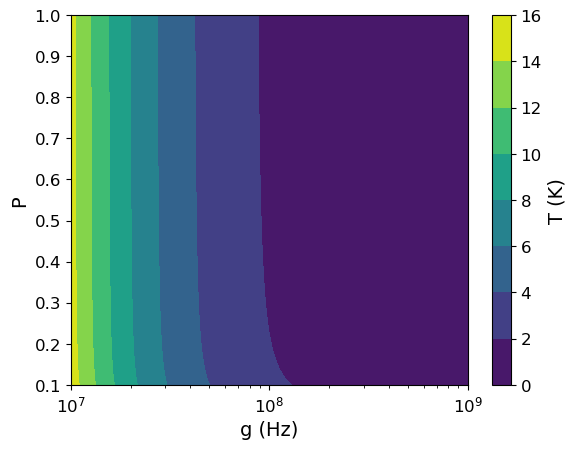

In [15]:
# Convert to temperature
t_P_sweep_1 = temp_from_photons(ωc, nbar_P_sweep_1)
plt.figure(2)
plt.contourf(gm, 1 / (1 + 2 * ncm), t_P_sweep_1)
plt.xlabel("g (Hz)")
plt.xscale("log")
plt.ylabel("P")
plt.colorbar(label='T (K)')
plt.savefig("T_gP_sweep_κ=0_T=77K.png", format='png', dpi=300)

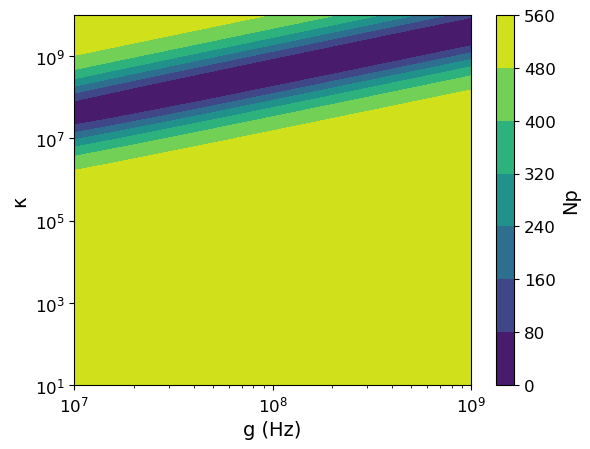

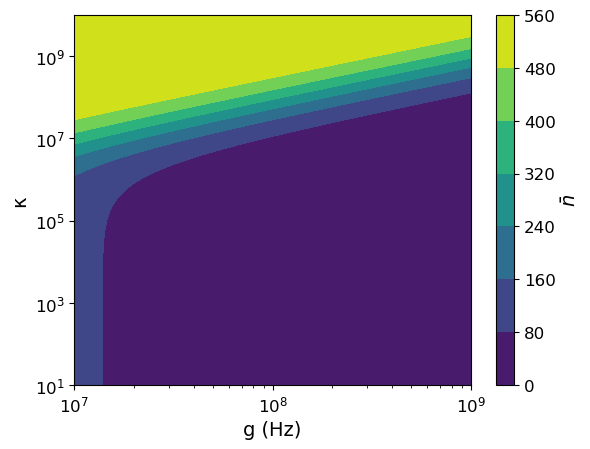

In [16]:
# Now let's do κ
g = np.logspace(7, 9, 10000)
κ_sweep = np.logspace(1, 10, 1000)

gm, κm = np.meshgrid(g, κ_sweep)
Np_κ_sweep = noise_pow(ω, ωc, κm, gm, gm, Q, 0, nc, nT)
plt.figure(1)
plt.contourf(gm, κm, Np_κ_sweep)
plt.xlabel("g (Hz)")
plt.ylabel("κ")
plt.yscale('log')
plt.xscale('log')
plt.colorbar(label='Np')
plt.savefig("Np_gκ_sweep_P=0.8_T=77K.png", format='png', dpi=300)

nbar_κ_sweep = mean_photons_cavity(κm, ωc, Q, gm, gm, nT, nc) 
plt.figure(2)
plt.contourf(gm, κm, nbar_κ_sweep)
plt.xlabel("g (Hz)")
plt.ylabel("κ")
plt.yscale('log')
plt.xscale('log')
plt.colorbar(label='$\\bar{n}$')
plt.savefig("n_gκ_sweep_P=0.8_T=77K.png", format='png', dpi=300)

## T = 5 K, Q = 25, 000

### Setup

In [17]:
# Now what if the initial temperature is 5 K?  According to Ethan, then Q = 25,000
κ = 0
ω = 0                                           
ωc = 2.87 * 2 * np.pi * 1e9        
hbar_ov_k = 7.639e-12   
Q = 2.5e4
T = 5
γ = ωc / Q 
P = 1

In [18]:
# Sweep over values of g now
g = np.logspace(6, 9, 10000)
r = g.copy()

In [19]:
# Calculate the number of photons
nc = 0.5 * (1 - P) / P
nT = (np.exp(hbar_ov_k * ωc / T) - 1) ** -1

In [20]:
Np_v_g = noise_pow(ω, ωc, κ, r, g, Q, 0, nc, nT)
T_v_g = hbar_ov_k * ωc * 2 * np.pi / np.log(1 / Np_v_g + 1)
nbar_v_g = mean_photons_cavity(κ, ωc, Q, g, g, nT, nc)

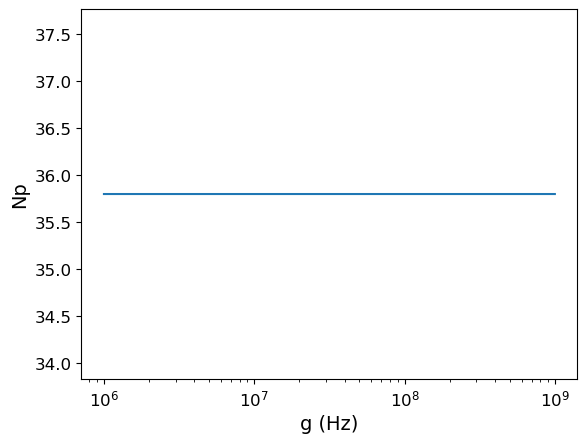

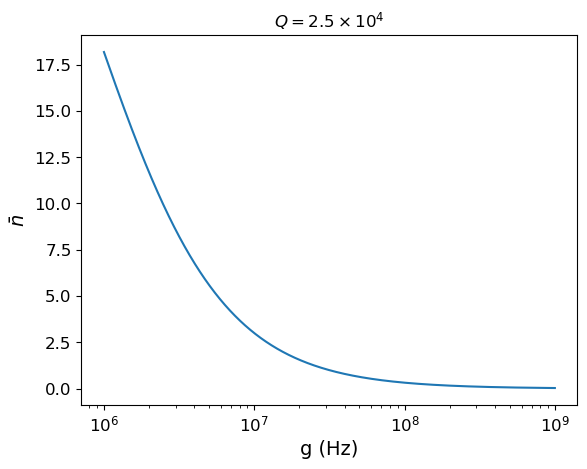

In [21]:
plt.figure(1)
plt.plot(g, Np_v_g)
plt.xlabel("g (Hz)")
plt.xscale('log')
plt.ylabel("Np")
plt.savefig("Np_v_g_κ=0_T=5K_P=0.8.png", format='png', dpi=300)

plt.figure(2)
plt.title("$Q=2.5\\times 10^4$")
plt.plot(g, nbar_v_g)
plt.xlabel("g (Hz)")
plt.xscale('log')
plt.ylabel("$\\bar{n}$")
plt.savefig("n_v_g_κ=0_T=5K_P=1.png", format='png', dpi=300)

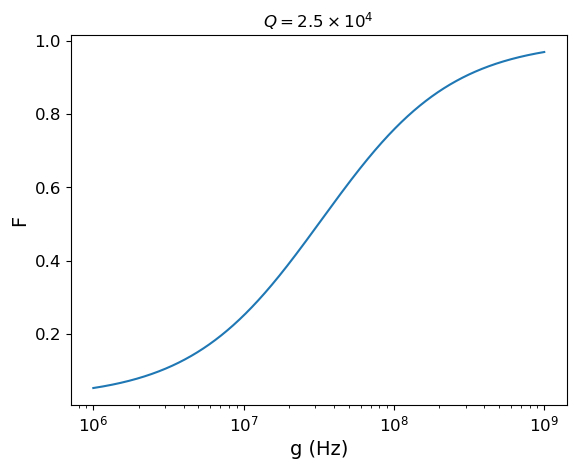

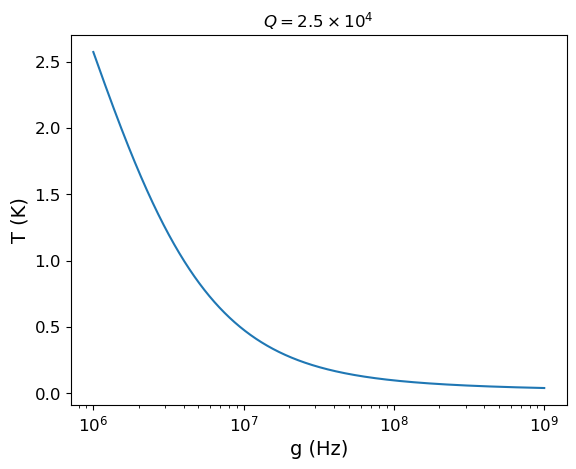

In [22]:
# Convert to fidelity
f = 1 / (nbar_v_g + 1)
plt.title("$Q=2.5\\times 10^4$")
plt.plot(g, f)
plt.xlabel("g (Hz)")
plt.xscale('log')
plt.ylabel("F")
plt.savefig("f_v_g_κ=0_T=5K_P=1.png", format='png', dpi=300)

# Convert to temperature
t = temp_from_photons(ωc, nbar_v_g)
plt.figure(2)
plt.title("$Q=2.5\\times 10^4$")
plt.plot(g, t)
plt.xlabel("g (Hz)")
plt.xscale('log')
plt.ylabel("T (K)")
#plt.yscale('log')
plt.savefig("t_v_g_κ=0_T=5K_P=1.png", format='png', dpi=300)

### Sweep over parameters

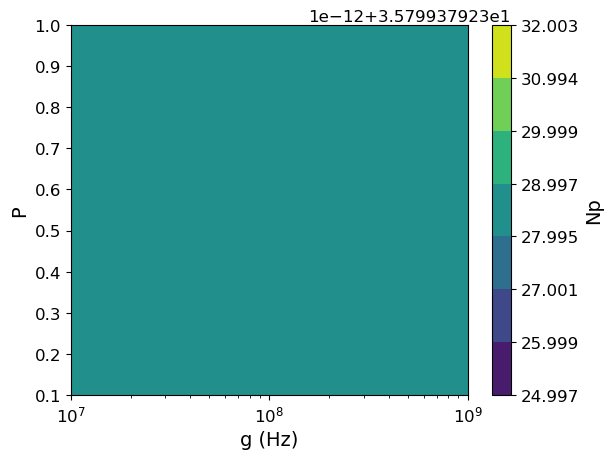

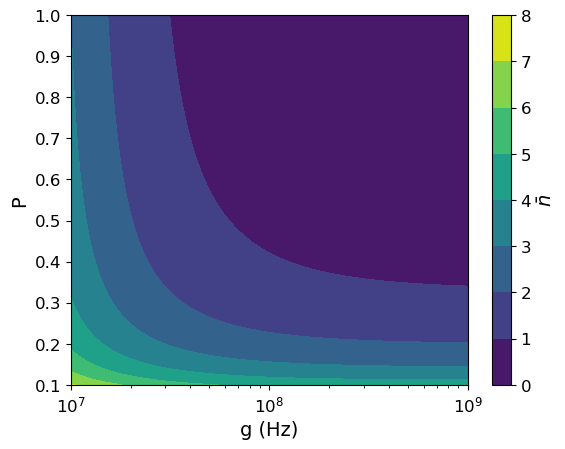

In [23]:
g = np.logspace(7, 9, 10000)
P_sweep = np.linspace(0.1, 1, 1000)
nc_sweep = 0.5 * (1 - P_sweep) / P_sweep

gm, ncm = np.meshgrid(g, nc_sweep)
Np_P_sweep = noise_pow(ω, ωc, κ, gm, gm, Q, 0, ncm, nT)
plt.figure(1)
plt.contourf(gm, 1 / (1 + 2 * ncm), Np_P_sweep)
plt.xlabel("g (Hz)")
plt.xscale("log")
plt.ylabel("P")
plt.colorbar(label='Np')
plt.savefig("Np_gP_sweep_κ=0_T=5K.png", format='png', dpi=300)

nbar_P_sweep_2 = mean_photons_cavity(κ, ωc, Q, gm, gm, nT, ncm) 
plt.figure(2)
plt.contourf(gm, 1 / (1 + 2 * ncm), nbar_P_sweep_2)
plt.xlabel("g (Hz)")
plt.xscale("log")
plt.ylabel("P")
plt.colorbar(label='$\\bar{n}$')
plt.savefig("n_gP_sweep_κ=0_T=5K.png", format='png', dpi=300)

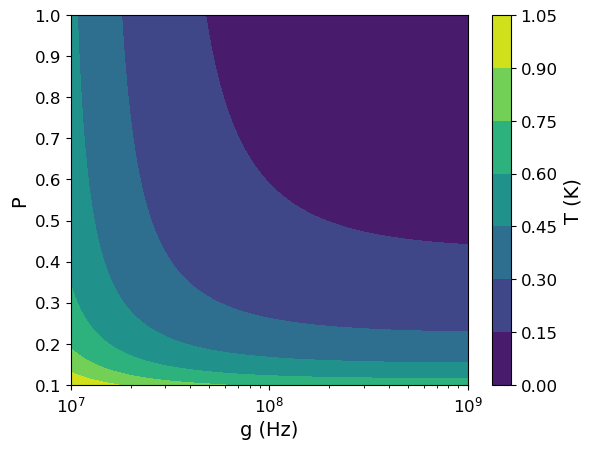

In [24]:
# Convert to temperature
t_P_sweep_2 = temp_from_photons(ωc, nbar_P_sweep_2)
plt.figure(2)
plt.contourf(gm, 1 / (1 + 2 * ncm), t_P_sweep_2)
plt.xlabel("g (Hz)")
plt.xscale("log")
plt.ylabel("P")
plt.colorbar(label='T (K)')
plt.savefig("T_gP_sweep_κ=0_T=5K.png", format='png', dpi=300)

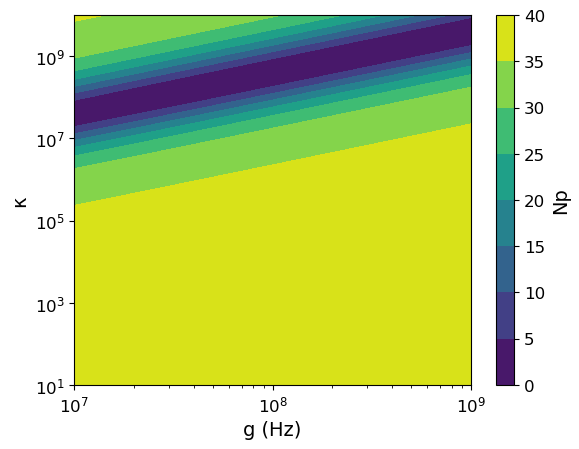

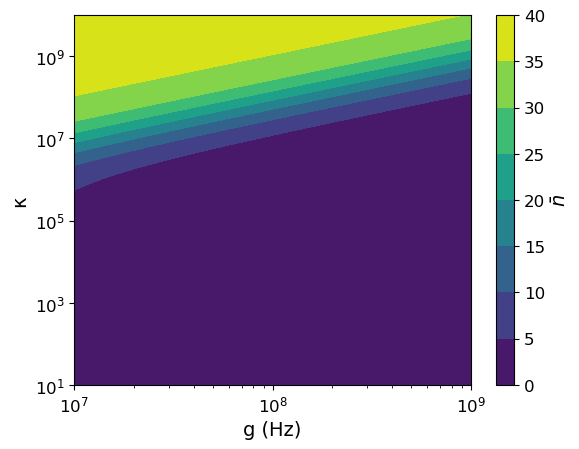

In [25]:
# Now let's do κ
g = np.logspace(7, 9, 10000)
κ_sweep = np.logspace(1, 10, 1000)

gm, κm = np.meshgrid(g, κ_sweep)
Np_κ_sweep = noise_pow(ω, ωc, κm, gm, gm, Q, 0, nc, nT)
plt.figure(1)
plt.contourf(gm, κm, Np_κ_sweep)
plt.xlabel("g (Hz)")
plt.ylabel("κ")
plt.yscale('log')
plt.xscale('log')
plt.colorbar(label='Np')
plt.savefig("Np_gκ_sweep_P=0.8_T=5K.png", format='png', dpi=300)

nbar_κ_sweep = mean_photons_cavity(κm, ωc, Q, gm, gm, nT, nc) 
plt.figure(2)
plt.contourf(gm, κm, nbar_κ_sweep)
plt.xlabel("g (Hz)")
plt.ylabel("κ")
plt.yscale('log')
plt.xscale('log')
plt.colorbar(label='$\\bar{n}$')
plt.savefig("n_gκ_sweep_P=0.8_T=5K.png", format='png', dpi=300)

### Temp vs P and g

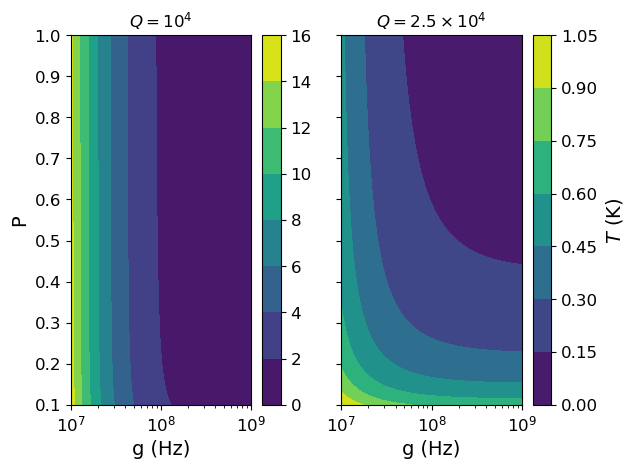

In [26]:
# Convert to temperature
fig = plt.figure(1)
ax = fig.subplots(1, 2, sharex='all', sharey='all')
cf = ax[0].contourf(gm, 1 / (1 + 2 * ncm), t_P_sweep_1)
ax[0].set_ylabel("P")
ax[0].set_xlabel("g (Hz)")
ax[0].set_xscale('log')
ax[0].set_title("$Q = 10^4$")

cf2 = ax[1].contourf(gm, 1 / (1 + 2 * ncm), t_P_sweep_2)
ax[1].set_xlabel("g (Hz)")
ax[1].set_title("$Q = 2.5 \\times 10^4$")

fig.colorbar(cf)
fig.colorbar(cf2, label='$T$ (K)')

plt.savefig("T_gP_sweep_κ=0_comb.png", format='png', dpi=300)

In [27]:
# Fidelity of the final state with the ideal ground state
# Noise (mode) temperature vs base temperature for a given cavity setup

## Miscellaneous

What is required for the cavities to reach < 1 photon for each base temperature?  From previous results, we can see that we'll probably need g > 10 MHz.  Let's for now assume an ideal case of $P = 1, \kappa = 0$.  We'll still use $r = g$ for now as well

We are assuming for simplicity that each spin in the ensemble has the same coupling strength $g_s$ to the cavity and that the total coupling strength is given by $g = \sqrt{Ng_s}$ where $N$ is the number of spins in the ensemble.  This is going to be determined by the volume $V_d$ of the diamond and the density $\rho$ of NV centers within it i.e. $N = \rho V_d$.  The individual spin coupling rate is implicitly determined by the cavity mode volume $V$ and the quality factor $Q$.  By plotting things in terms of $V_d, \rho$ and $V$, we can get an understanding of the physical parameters required for the experimental setup to achieve desired cavity photon numbers, mode temperature, or fidelity with the ground state given different possible values of $g_s$.

In [28]:
# We have two situations regarding the cavity setup
T1, Q1 = 77, 1e4
T2, Q2 = 5, 2.5e4

In [29]:
# We'll normalize the diamond volume by the mode volume
V = 1.7  # cm^3
Vd = np.linspace(1e-2, 1.7, 1000)
ρ = np.logspace(-3, 3, 1000)  # ppm

In [30]:
# I'm not sure what gs should be with the Vd and Q that we're using
# For now, I'll just assume that its 1 Hz in the T1 case and 100 Hz in the T2 case
gs1 = 1
gs2 = 10

In [31]:
# We'll also assume that P = 1 and κ = 0 as the ideal case
P = 1
κ = 0
ωc = 2.87 * 2 * np.pi * 1e9

In [32]:
nT1 = photons_from_temp(ωc, T1)
nT2 = photons_from_temp(ωc, T2)
nc = 0.5 * (1 - P) / P

In [33]:
# Now create mesh grid for collective g values
ρm, Vdm = np.meshgrid(ρ, Vd)

# Then
N = ρm * 1e-6 * (3.53 * Vdm / 12.01) * 6.022e23
g1 = np.sqrt(N) * gs1
g2 = np.sqrt(N) * gs2

In [34]:
print("Min NVs: %3e, Max NVs: %3e" % (N.min(), N.max()))
print("Min g1: %3e, Max g1: %3e" % (g1.min(), g1.max()))

Min NVs: 1.769997e+12, Max NVs: 3.008994e+20
Min g1: 1.330412e+06, Max g1: 1.734645e+10


In [35]:
n1_g1 = mean_photons_cavity(κ, ωc, Q1, g1, g1, nT1, nc)
n1_g2 = mean_photons_cavity(κ, ωc, Q1, g2, g2, nT1, nc)
n2_g1 = mean_photons_cavity(κ, ωc, Q2, g1, g1, nT2, nc)
n2_g2 = mean_photons_cavity(κ, ωc, Q2, g2, g2, nT2, nc)

Text(0.5, 0.98, '$g_s=1$ Hz')

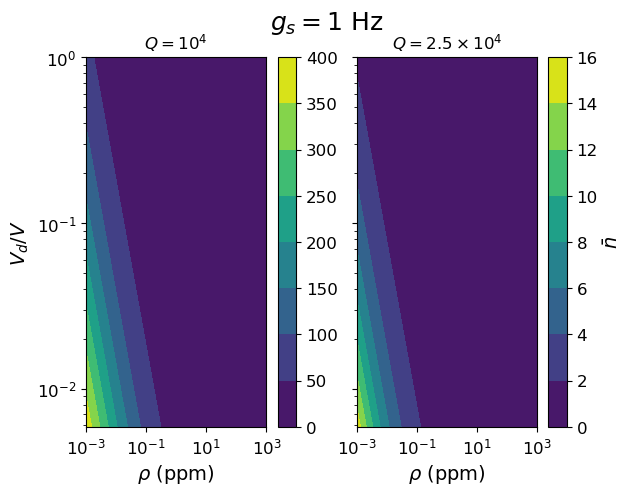

In [36]:
fig1 = plt.figure(1)
ax = fig1.subplots(1,2, sharex='all', sharey='all')
cf = ax[0].contourf(ρm, Vdm / V, n1_g1)
ax[0].set_xlabel("$\\rho$ (ppm)")
ax[0].set_ylabel("$V_d / V$")
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_title("$Q=10^4$")

cf2 = ax[1].contourf(ρm, Vdm / V, n2_g1)
ax[1].set_xlabel("$\\rho$ (ppm)")
ax[1].set_title("$Q=2.5\\times 10^4$")
fig1.colorbar(cf)
fig1.colorbar(cf2, label='$\\bar{n}$')
fig1.suptitle("$g_s=1$ Hz")

Text(0.5, 0.98, '$g_s=10$ Hz')

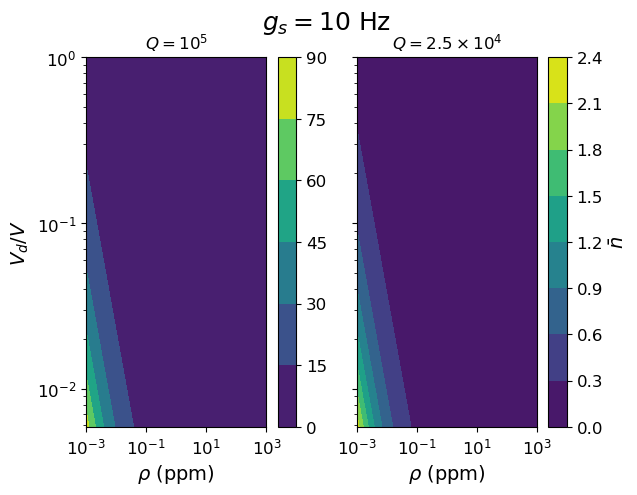

In [37]:
fig1 = plt.figure(1)
ax = fig1.subplots(1,2, sharex='all', sharey='all')
cf = ax[0].contourf(ρm, Vdm / V, n1_g2)
ax[0].set_xlabel("$\\rho$ (ppm)")
ax[0].set_ylabel("$V_d / V$")
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_title("$Q=10^5$")

cf2 = ax[1].contourf(ρm, Vdm / V, n2_g2)
ax[1].set_xlabel("$\\rho$ (ppm)")
ax[1].set_title("$Q=2.5\\times 10^4$")
fig1.colorbar(cf)
fig1.colorbar(cf2, label='$\\bar{n}$')
fig1.suptitle("$g_s=10$ Hz")

In [38]:
# Convert this to temperature
t1_g1 = temp_from_photons(ωc, n1_g1)
t1_g2 = temp_from_photons(ωc, n1_g2)
t2_g1 = temp_from_photons(ωc, n2_g1)
t2_g2 = temp_from_photons(ωc, n2_g2)

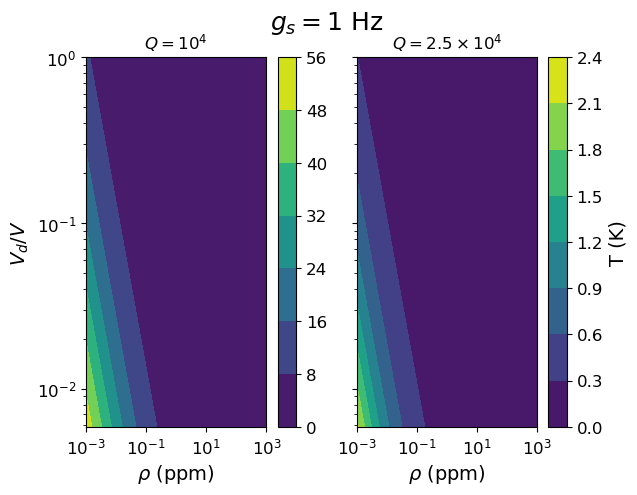

In [39]:
fig1 = plt.figure(1)
ax = fig1.subplots(1,2, sharex='all', sharey='all')
cf = ax[0].contourf(ρm, Vdm / V, t1_g1)
ax[0].set_xlabel("$\\rho$ (ppm)")
ax[0].set_ylabel("$V_d / V$")
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_title("$Q=10^4$")

cf2 = ax[1].contourf(ρm, Vdm / V, t2_g1)
ax[1].set_xlabel("$\\rho$ (ppm)")
ax[1].set_title("$Q=2.5\\times 10^4$")
fig1.colorbar(cf)
fig1.colorbar(cf2, label='T (K)')
fig1.suptitle("$g_s=1$ Hz")

plt.savefig("t_vd_p_sweep_gs=1_comb.png", format='png', dpi=300)

Text(0.5, 0.98, '$g_s=10$ Hz')

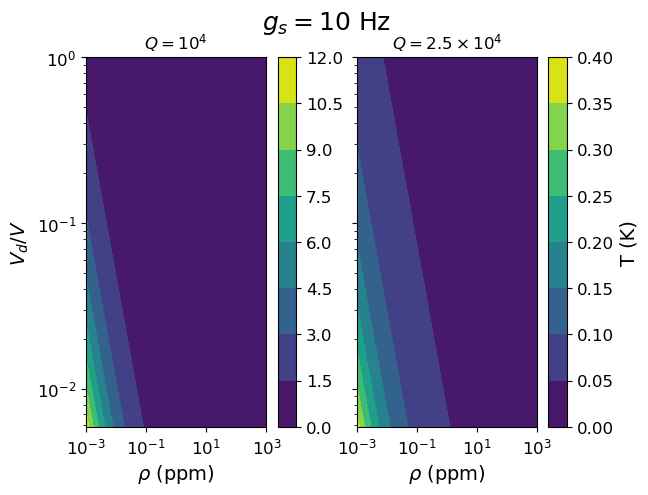

In [40]:
fig1 = plt.figure(1)
ax = fig1.subplots(1,2, sharex='all', sharey='all')
cf = ax[0].contourf(ρm, Vdm / V, t1_g2)
ax[0].set_xlabel("$\\rho$ (ppm)")
ax[0].set_ylabel("$V_d / V$")
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_title("$Q=10^4$")

cf2 = ax[1].contourf(ρm, Vdm / V, t2_g2)
ax[1].set_xlabel("$\\rho$ (ppm)")
ax[1].set_title("$Q=2.5\\times 10^4$")
fig1.colorbar(cf)
fig1.colorbar(cf2, label='T (K)')
fig1.suptitle("$g_s=10$ Hz")

In [41]:
# Convert to fidelity
f1_g1 = 1 / (1 + n1_g1)
f1_g2 = 1 / (1 + n1_g2)
f2_g1 = 1 / (1 + n2_g1)
f2_g2 = 1 / (1 + n2_g2)
print("Max f1_g1: %3e \nMax f1_g2: %3e \nMax f2_g1: %3e \nMax f2_g2: %3e" % (f1_g1.max(), f1_g2.max(), f2_g1.max(), f2_g2.max()))

Max f1_g1: 9.323458e-01 
Max f1_g2: 9.927952e-01 
Max f2_g1: 9.981428e-01 
Max f2_g2: 9.998140e-01


Text(0.5, 0.98, '$g_s=1$ Hz')

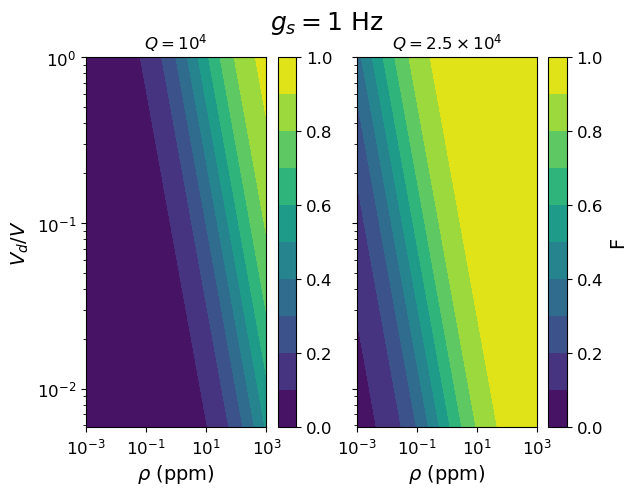

In [42]:
fig1 = plt.figure(1)
ax = fig1.subplots(1,2, sharex='all', sharey='all')
cf = ax[0].contourf(ρm, Vdm / V, f1_g1, 9)
ax[0].set_xlabel("$\\rho$ (ppm)")
ax[0].set_ylabel("$V_d / V$")
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_title("$Q=10^4$")

cf2 = ax[1].contourf(ρm, Vdm / V, f2_g1, 9)
ax[1].set_xlabel("$\\rho$ (ppm)")
ax[1].set_title("$Q=2.5\\times 10^4$")
fig1.colorbar(cf)
fig1.colorbar(cf2, label='F')
fig1.suptitle("$g_s=1$ Hz")

Text(0.5, 0.98, '$g_s=10$ Hz')

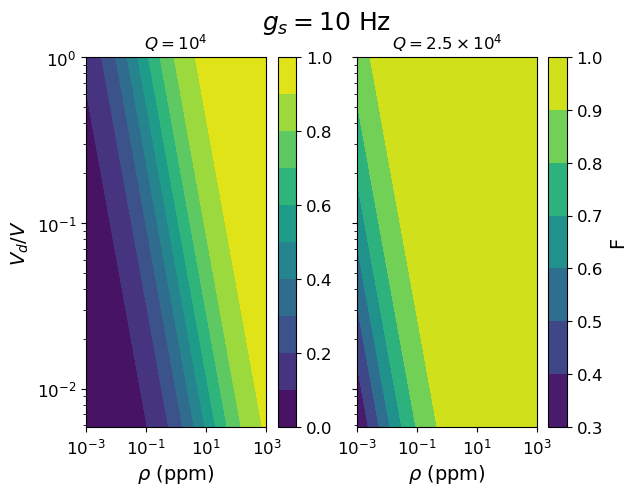

In [43]:
fig1 = plt.figure(1)
ax = fig1.subplots(1,2, sharex='all', sharey='all')
cf = ax[0].contourf(ρm, Vdm / V, f1_g2, 9)
ax[0].set_xlabel("$\\rho$ (ppm)")
ax[0].set_ylabel("$V_d / V$")
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_title("$Q=10^4$")

cf2 = ax[1].contourf(ρm, Vdm / V, f2_g2)
ax[1].set_xlabel("$\\rho$ (ppm)")
ax[1].set_title("$Q=2.5\\times 10^4$")
fig1.colorbar(cf)
fig1.colorbar(cf2, label='F')
fig1.suptitle("$g_s=10$ Hz")

### $g_s = 10^5$, P varies

In [44]:
gs = 1
P = np.array([0.5, 0.75, 1])
nc = 0.5 * (1 - P) / P

In [45]:
n1 = photons_from_temp(ωc, T1)
n2 = photons_from_temp(ωc, T2)

In [46]:
ρm, Vdm = np.meshgrid(ρ, Vd)
N = ρm * 1e-6 * (3.53 * Vdm / 12.01) * 6.022e23
g = np.sqrt(N) * gs

In [47]:
# Calculate nbar for each P as ρ and Vd vary
n1_P1 = mean_photons_cavity(κ, ωc, Q1, g, g, n1, nc[0])
n1_P2 = mean_photons_cavity(κ, ωc, Q1, g, g, n1, nc[1])
n1_P3 = mean_photons_cavity(κ, ωc, Q1, g, g, n1, nc[2])

n2_P1 = mean_photons_cavity(κ, ωc, Q2, g, g, n2, nc[0])
n2_P2 = mean_photons_cavity(κ, ωc, Q2, g, g, n2, nc[1])
n2_P3 = mean_photons_cavity(κ, ωc, Q2, g, g, n2, nc[2])

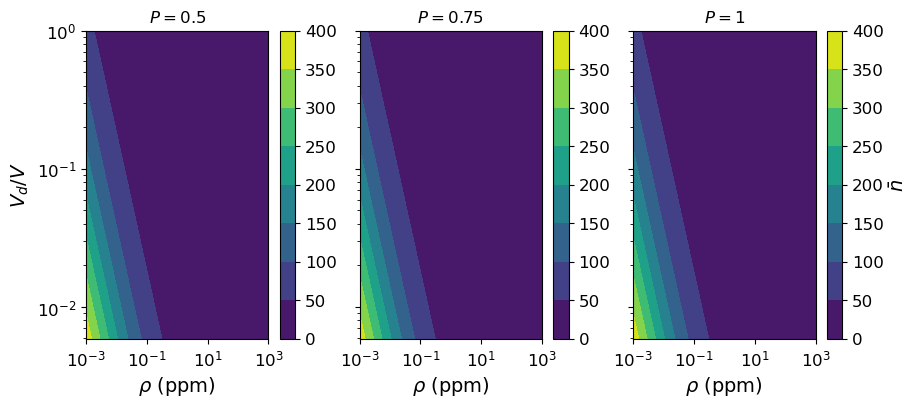

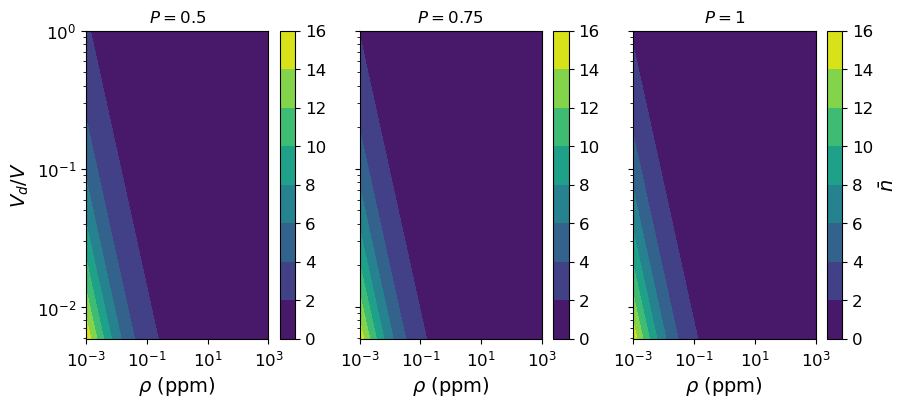

In [48]:
fig1 = plt.figure(1, figsize=(10, 4))
ax = fig1.subplots(1, 3, sharex='all', sharey='all')
cf00 = ax[0].contourf(ρm, Vdm / V, n1_P1)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel('$V_d/V$')
ax[0].set_title("$P=0.5$")
ax[0].set_xlabel("$\\rho$ (ppm)")
cf01 = ax[1].contourf(ρm, Vdm / V, n1_P2)
ax[1].set_title("$P=0.75$")
ax[1].set_xlabel("$\\rho$ (ppm)")
cf02 = ax[2].contourf(ρm, Vdm / V, n1_P3)
ax[2].set_title("$P=1$")
ax[2].set_xlabel("$\\rho$ (ppm)")
fig1.colorbar(cf00)
fig1.colorbar(cf01)
fig1.colorbar(cf02, label='$\\bar{n}$')

fig2 = plt.figure(2, figsize=(10, 4))
ax = fig2.subplots(1, 3, sharex='all', sharey='all')
cf00 = ax[0].contourf(ρm, Vdm / V, n2_P1)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel('$V_d/V$')
ax[0].set_title("$P=0.5$")
ax[0].set_xlabel("$\\rho$ (ppm)")
cf01 = ax[1].contourf(ρm, Vdm / V, n2_P2)
ax[1].set_title("$P=0.75$")
ax[1].set_xlabel("$\\rho$ (ppm)")
cf02 = ax[2].contourf(ρm, Vdm / V, n2_P3)
ax[2].set_title("$P=1$")
ax[2].set_xlabel("$\\rho$ (ppm)")
fig2.colorbar(cf00)
fig2.colorbar(cf01)
fig2.colorbar(cf02, label='$\\bar{n}$')


In [49]:
t1_P1 = temp_from_photons(ωc, n1_P1)
t1_P2 = temp_from_photons(ωc, n1_P2)
t1_P3 = temp_from_photons(ωc, n1_P3)

t2_P1 = temp_from_photons(ωc, n2_P1)
t2_P2 = temp_from_photons(ωc, n2_P2)
t2_P3 = temp_from_photons(ωc, n2_P3)

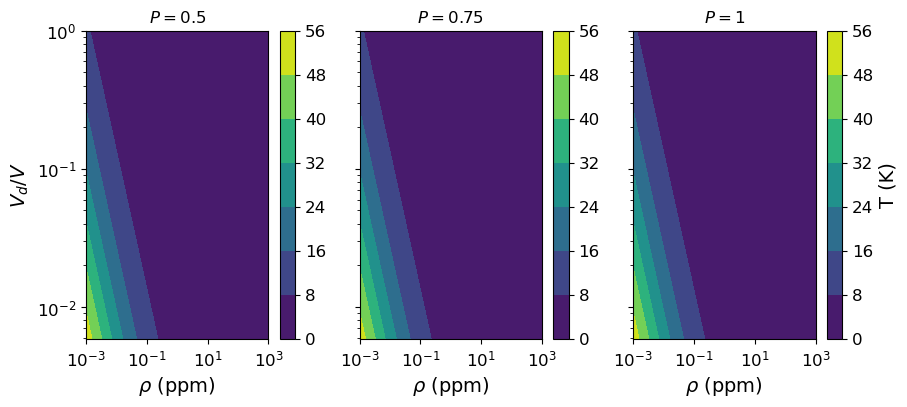

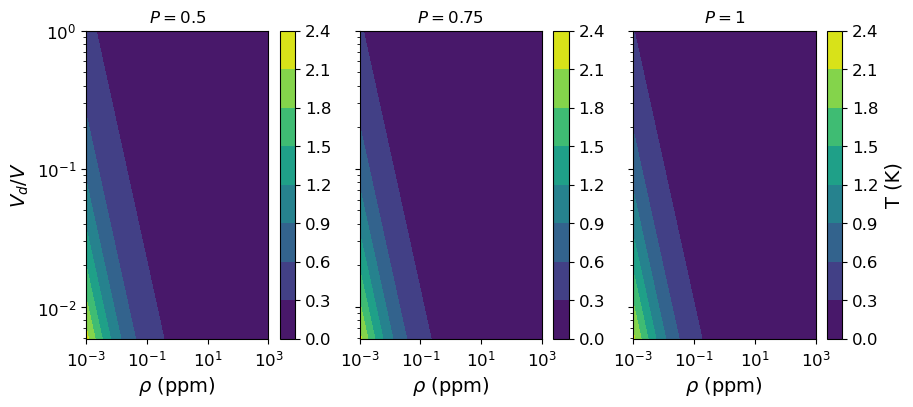

In [50]:
fig1 = plt.figure(1, figsize=(10, 4))
ax = fig1.subplots(1, 3, sharex='all', sharey='all')
cf00 = ax[0].contourf(ρm, Vdm / V, t1_P1)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel('$V_d/V$')
ax[0].set_title("$P=0.5$")
ax[0].set_xlabel("$\\rho$ (ppm)")
cf01 = ax[1].contourf(ρm, Vdm / V, t1_P2)
ax[1].set_title("$P=0.75$")
ax[1].set_xlabel("$\\rho$ (ppm)")
cf02 = ax[2].contourf(ρm, Vdm / V, t1_P3)
ax[2].set_title("$P=1$")
ax[2].set_xlabel("$\\rho$ (ppm)")
fig1.colorbar(cf00)
fig1.colorbar(cf01)
fig1.colorbar(cf02, label='T (K)')

fig2 = plt.figure(2, figsize=(10, 4))
ax = fig2.subplots(1, 3, sharex='all', sharey='all')
cf00 = ax[0].contourf(ρm, Vdm / V, t2_P1)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel('$V_d/V$')
ax[0].set_title("$P=0.5$")
ax[0].set_xlabel("$\\rho$ (ppm)")
cf01 = ax[1].contourf(ρm, Vdm / V, t2_P2)
ax[1].set_title("$P=0.75$")
ax[1].set_xlabel("$\\rho$ (ppm)")
cf02 = ax[2].contourf(ρm, Vdm / V, t2_P3)
ax[2].set_title("$P=1$")
ax[2].set_xlabel("$\\rho$ (ppm)")
fig2.colorbar(cf00)
fig2.colorbar(cf01)
fig2.colorbar(cf02, label='T (K)')


In [51]:
# Convert to fidelity
f1_P1 = 1 / (1 + n1_P1)
f1_P2 = 1 / (1 + n1_P2)
f1_P3 = 1 / (1 + n1_P3)
f2_P1 = 1 / (1 + n2_P1)
f2_P2 = 1 / (1 + n2_P2)
f2_P3 = 1 / (1 + n2_P3)

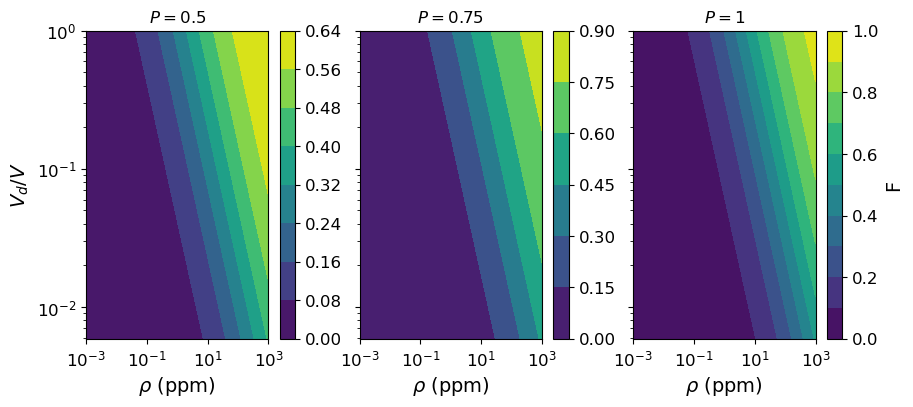

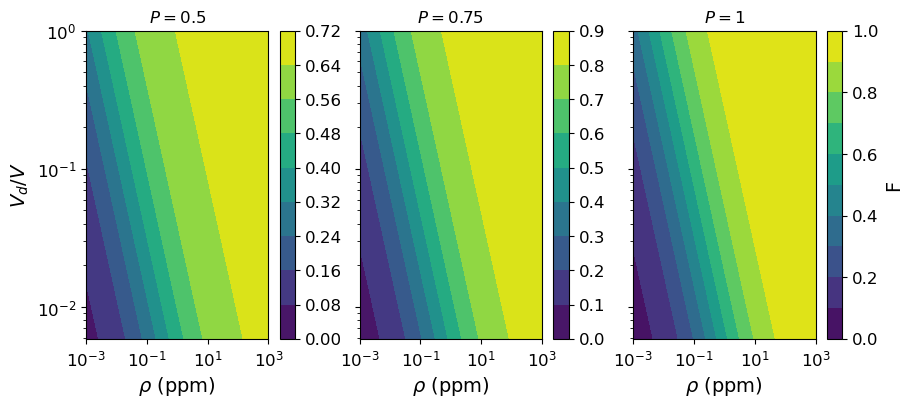

In [52]:
fig1 = plt.figure(1, figsize=(10, 4))
ax = fig1.subplots(1, 3, sharex='all', sharey='all')
cf00 = ax[0].contourf(ρm, Vdm / V, f1_P1)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel('$V_d/V$')
ax[0].set_title("$P=0.5$")
ax[0].set_xlabel("$\\rho$ (ppm)")
cf01 = ax[1].contourf(ρm, Vdm / V, f1_P2)
ax[1].set_title("$P=0.75$")
ax[1].set_xlabel("$\\rho$ (ppm)")
cf02 = ax[2].contourf(ρm, Vdm / V, f1_P3, 9)
ax[2].set_title("$P=1$")
ax[2].set_xlabel("$\\rho$ (ppm)")
fig1.colorbar(cf00)
fig1.colorbar(cf01)
fig1.colorbar(cf02, label='F')

fig2 = plt.figure(2, figsize=(10, 4))
ax = fig2.subplots(1, 3, sharex='all', sharey='all')
cf00 = ax[0].contourf(ρm, Vdm / V, f2_P1)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel('$V_d/V$')
ax[0].set_title("$P=0.5$")
ax[0].set_xlabel("$\\rho$ (ppm)")
cf01 = ax[1].contourf(ρm, Vdm / V, f2_P2)
ax[1].set_title("$P=0.75$")
ax[1].set_xlabel("$\\rho$ (ppm)")
cf02 = ax[2].contourf(ρm, Vdm / V, f2_P3, 9)
ax[2].set_title("$P=1$")
ax[2].set_xlabel("$\\rho$ (ppm)")
fig2.colorbar(cf00)
fig2.colorbar(cf01)
fig2.colorbar(cf02, label='F')

In [53]:
f1_P3.max(), f2_P3.max()

(0.9323458197218547, 0.9981427503924581)

### What happens if $r \neq g$?

In [54]:
# We have 2 situations
T1, Q1 = 77, 1e4
T2, Q2 = 5, 2.5e4
κ = 0
P = 1
ωc = 2.87 * 2 * np.pi * 1e9
g = np.logspace(7, 11, 10000)
r = np.logspace(1, 11, 10000)

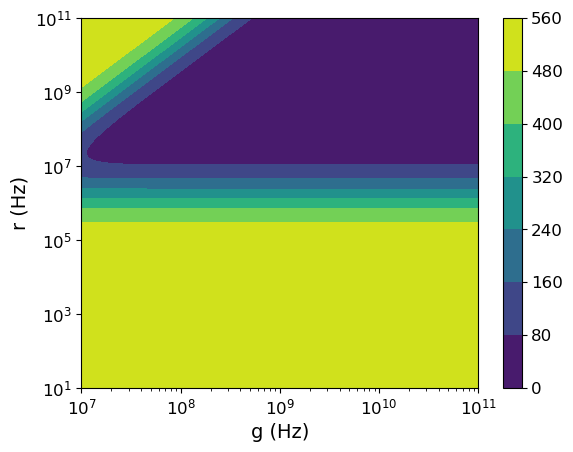

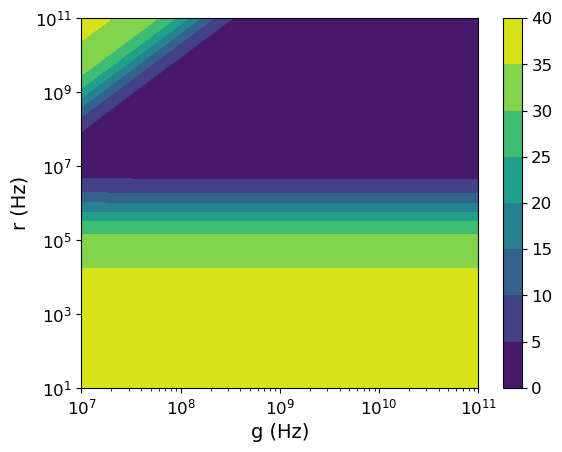

In [55]:
gm, rm = np.meshgrid(g, r)
n_rg_sweep_T1 = mean_photons_cavity(κ, ωc, Q1, rm, gm, nT1, 0)
n_rg_sweep_T2 = mean_photons_cavity(κ, ωc, Q2, rm, gm, nT2, 0)
plt.figure(1)
plt.contourf(gm, rm, n_rg_sweep_T1)
plt.colorbar()
plt.xlabel("g (Hz)")
plt.xscale('log')
plt.ylabel("r (Hz)")
plt.yscale('log')

plt.figure(2)
plt.contourf(gm, rm, n_rg_sweep_T2)
plt.colorbar()
plt.xlabel("g (Hz)")
plt.xscale('log')
plt.ylabel("r (Hz)")
plt.yscale('log')

So $r \sim g$ for best performance